Part a.

In [ ]:
import numpy as np

filepath='3.data'
data=np.loadtxt(filepath)

moment_1=np.mean(data)
moment_2=np.mean(data**2)
print("Moment for i=1 is:",moment_1)
print("Moment for i=2 is:",moment_2)

Moment for i=1 is: 6.496145618324817
Moment for i=2 is: 46.554361807879815


Part b.

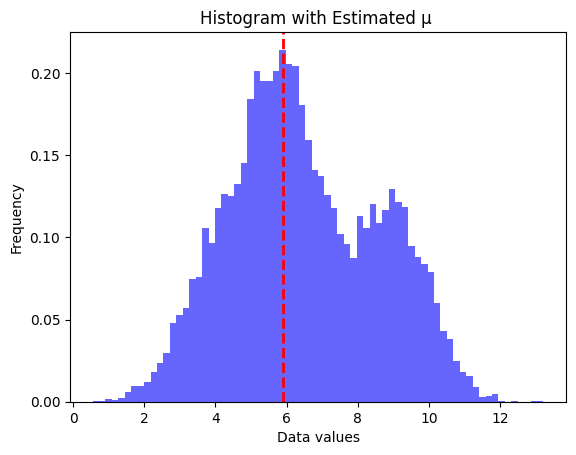

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

filepath='3.data'
data=np.loadtxt(filepath)

counts, bin_edges, _ = plt.hist(data, bins=70, density=True, alpha=0.6, color='b')

# Step 3: Estimate the mode
# The mode is the midpoint of the bin with the highest count
max_bin_index = np.argmax(counts)
mode_estimate = (bin_edges[max_bin_index] + bin_edges[max_bin_index + 1]) / 2

# Plot the estimated mode as a vertical line
plt.axvline(mode_estimate, color='r', linestyle='dashed', linewidth=2)

plt.title(f'Histogram with Estimated μ ')
plt.xlabel('Data values')
plt.ylabel('Frequency')

plt.savefig('3b.png')
plt.show()

Part c

20 0.32968652963756667
[3.35396818e-04 3.29922694e-03 1.54155510e-02 4.54918457e-02
 9.50923859e-02 1.49664562e-01 1.84027295e-01 1.81023724e-01
 1.44681205e-01 9.48798762e-02 5.13322205e-02 2.29520046e-02
 8.46652395e-03 2.56256584e-03 6.30185335e-04 1.23979974e-04
 1.90556961e-05 2.20525667e-06 1.80771995e-07 2.30156933e-10]


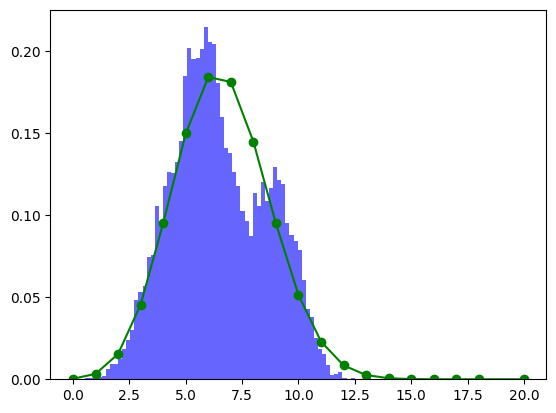

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.stats import binom

file = '3.data'
data = np.loadtxt(file)

mu_1 = np.mean(data)
mu_2 = np.mean(data**2)


def equations(params):
    n, p = params
    mu_1_bin= n*p
    mu_2_bin= n*(n-1)*(p**2)+n*p
    return [mu_1_bin - mu_1, mu_2_bin - mu_2]

n,p=fsolve(equations,[1,1])
n_floor = np.floor(n)
n_ceil = np.ceil(n)

# Compute errors for floor and ceiling values
floor_error = np.abs(np.array(equations([n_floor, p])))
ceil_error = np.abs(np.array(equations([n_ceil, p])))

# Choose the one with the smaller error
if np.sum(floor_error) < np.sum(ceil_error):
    n_star = int(n_floor)
else:
    n_star = int(n_ceil)

p_star = p
print(n_star,p_star)

plt.hist(data, bins=70, density=True, alpha=0.6, color='b')
x = np.linspace(0, n_star, num=20,dtype=int)
binom_pmf = binom.pmf(x, n_star, p_star)
print(binom_pmf)
plt.plot(x,binom_pmf, marker='o', linestyle='-', color='g')
#plt.plot(x, 'bo', label=f'Binomial PMF (n={n_star}, p={p_star:.4f})')
